# Analisando a taxa de mortalidade ao longo dos anos

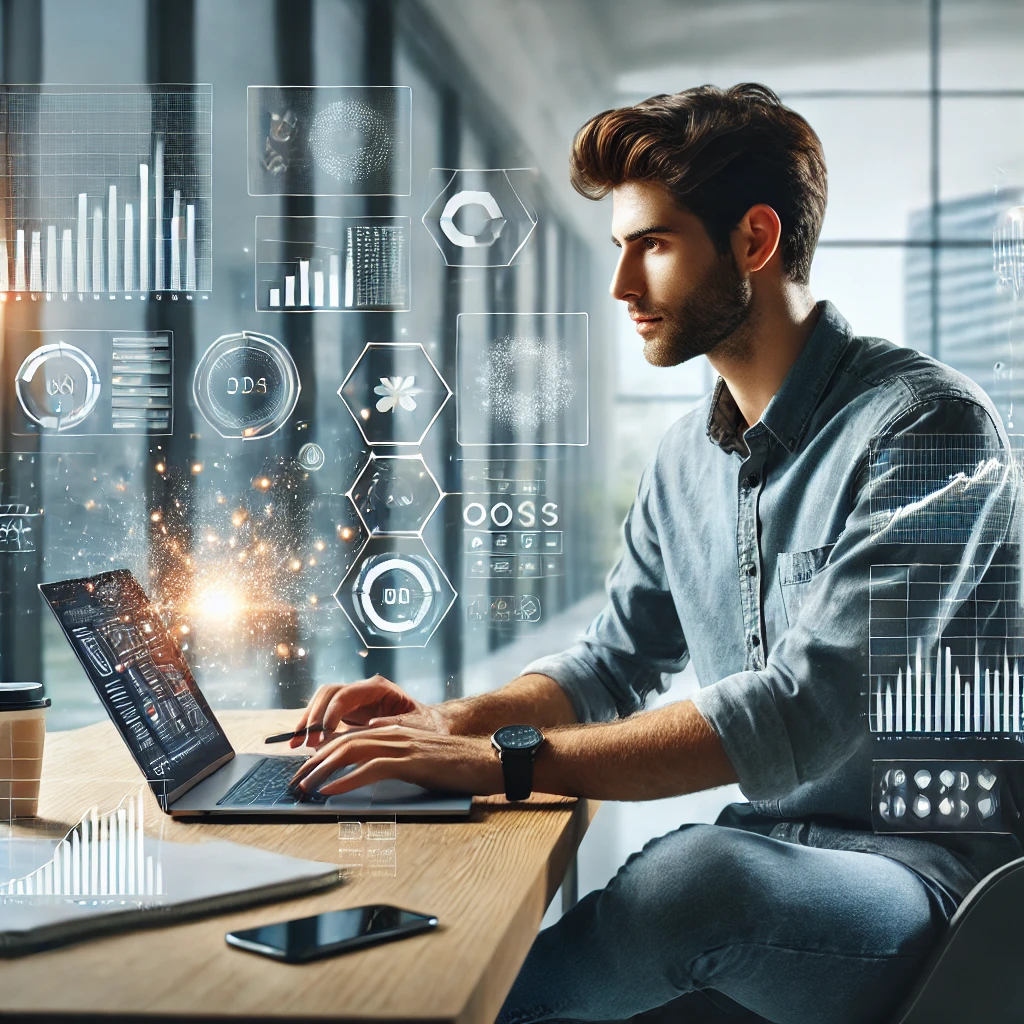

<h2><b>INTRODUÇÃO</b></h2>

A taxa de mortalidade é um indicador demográfico que mede o número de óbitos em uma população dentro de um período específico, geralmente expressa por mil habitantes.<br> 
Esse índice pode ser analisado de diferentes formas, como mortalidade infantil, por doenças específicas ou por causas externas, auxiliando na compreensão das condições de saúde de uma região. A análise de dados nesse contexto permite identificar padrões, tendências e fatores de risco associados à mortalidade, ajudando na formulação de políticas públicas e estratégias preventivas. Com o uso de técnicas estatísticas e aprendizado de máquina, é possível prever variações na taxa de mortalidade e otimizar recursos na área da saúde. <br>
Além disso, a segmentação por grupos etários, gênero e localização geográfica possibilita intervenções mais precisas. Dados socioeconômicos, acesso a serviços de saúde e hábitos de vida são variáveis que podem impactar significativamente os resultados. <br>
Assim, o estudo da mortalidade, baseado em dados, torna-se uma ferramenta essencial para a melhoria da qualidade de vida da população.

Esse projeto faz parte de um desafio proposto pelo <i><b> André Yukio </b></i>, da <b><a href="https://universidadedosdados.com/">Universidade dos Dados</a></b>, que tem como objetivo estar aprimorando os conhecimentos da análise de dados utilizando datasets mais próximos da realidade de um mercado de trabalho.

<h2><b>Importação do Dataset</b></h2>

In [2]:
# Importações de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importação do dataset
ihm = pd.read_csv("IHME.csv")
ihm.head()

,Country Code,Country Name,Year,Age Group,Sex,Number of Deaths,Death Rate Per 100000
0,AFG,Afghanistan,1970,0-6 days,Male,19241,318292.9
1,AFG,Afghanistan,1970,0-6 days,Female,12600,219544.2
2,AFG,Afghanistan,1970,0-6 days,Both,31840,2702.7
3,AFG,Afghanistan,1970,7-27 days,Male,15939,92701.0
4,AFG,Afghanistan,1970,7-27 days,Female,11287,68594.5


<h2><b>Análise geral do Dataset</b></h2>

In [16]:
# Número de missings (valores ausentes) em cada coluna
print(ihm.isna().sum())

Country Code             0
Country Name             0
Year                     0
Age Group                0
Sex                      0
Number of Deaths         0
Death Rate Per 100000    0
dtype: int64


In [34]:
# Número de países distintos no dataset
print(ihm["Country Name"].unique())
print(f" Número de países distintos no dataset: {ihm["Country Name"].nunique()} países.")

['Afghanistan' 'Angola' 'Albania' 'Andorra' 'United Arab Emirates'
 'Argentina' 'Armenia' 'Antigua and Barbuda' 'Australia' 'Austria'
 'Azerbaijan' 'Burundi' 'Belgium' 'Benin' 'Burkina Faso' 'Bangladesh'
 'Bulgaria' 'Bahrain' 'Bahamas' 'Bosnia and Herzegovina' 'Belarus'
 'Belize' 'Bolivia' 'Brazil' 'Barbados' 'Brunei Darussalam' 'Bhutan'
 'Botswana' 'Central African Republic' 'Canada' 'Switzerland' 'Chile'
 'China' "Cote d'Ivoire" 'Cameroon'
 'Congo, the Democratic Republic of the' 'Congo' 'Colombia' 'Comoros'
 'Cape Verde' 'Costa Rica' 'Cuba' 'Cyprus' 'Czech Republic' 'Germany'
 'Djibouti' 'Dominica' 'Denmark' 'Dominican Republic' 'Algeria' 'Ecuador'
 'Egypt' 'Eritrea' 'Spain' 'Estonia' 'Ethiopia' 'Finland' 'Fiji' 'France'
 'Micronesia, Federated States of' 'Gabon' 'United Kingdom' 'Georgia'
 'Ghana' 'Guinea' 'Gambia' 'Guinea-Bissau' 'Equatorial Guinea' 'Greece'
 'Grenada' 'Guatemala' 'Guyana' 'Honduras' 'Croatia' 'Haiti' 'Hungary'
 'Indonesia' 'India' 'Ireland' 'Iran, Islamic Republi

In [38]:
# Quantidade de anos disponíveis
print(ihm["Year"].unique())
print(f" Quantidade de anos disponíveis: {ihm["Year"].nunique()} ")

[1970 1980 1990 2000 2010]
 Quantidade de anos disponíveis: 5 


In [42]:
# Número de linhas no dataset
print(f" Quantidade de linhas no dataset: {ihm.shape[0]} linhas.")

 Quantidade de linhas no dataset: 58905 linhas.


<h2><b>Questões para Análise</b></h2>

<b>1. Qual país tem a maior média de taxa de mortalidade por 100.000 indivíduos ao longo de todos os anos?</b>

In [107]:
# Converte a coluna "Death Rate Per 100000" para numérico, garantindo que os valores sejam tratados corretamente
ihm["Death Rate Per 100000"] = pd.to_numeric(ihm["Death Rate Per 100000"])
# Calcula a média da taxa de mortalidade por país
media_mortalidade = ihm.groupby("Country Name")["Death Rate Per 100000"].mean()

# Exibe a média da taxa de mortalidade ordenada do maior para o menor
print(media_mortalidade.sort_values(ascending=False))

# Identifica e exibe o país com a maior média de taxa de mortalidade
print(f"O país com a maior média de taxa de mortalidade é {media_mortalidade.idxmax()} com uma média de {media_mortalidade.max():.2f} mortes por 100.000 indivíduos.")

Country Name
Mali            16863.345397
Sierra Leone    15758.400000
Guinea          15182.808571
Ethiopia        15061.539365
Pakistan        14947.265397
                    ...     
Iceland          3343.599365
Sweden           3279.526984
Japan            3221.328571
Denmark          3191.769841
Andorra          3132.655238
Name: Death Rate Per 100000, Length: 187, dtype: float64
O país com a maior média de taxa de mortalidade é Mali com uma média de 16863.35 mortes por 100.000 indivíduos.


------------------------

<b> 2. Existem diferenças significativas nas taxas de mortalidade entre homens e mulheres em diferentes grupos etários para os países da América do Sul?</b>

In [109]:
# Lista dos países sul-americanos a serem filtrados
sulamericanos = [ "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Guyana", "Paraguay", "Peru", "Suriname", "Uruguay", "Venezuela"]

# Filtra os dados apenas para os países sul-americanos
paises_sulamericanos_ihm = ihm[ihm["Country Name"].isin(sulamericanos)]

# Cria uma tabela dinâmica  com a média da taxa de mortalidade, 
# organizada por país, faixa etária e sexo
tabela_sula = paises_sulamericanos_ihm.pivot_table(index='Country Name', columns=['Age Group', 'Sex'], values="Death Rate Per 100000", aggfunc="mean")

############################################

# Função para destacar o maior e o menor valor de cada coluna
def highlight_max_min(data):
    styles = data.copy()
    for col in data.columns:
        max_val = data[col].max() # Maior valor da coluna
        min_val = data[col].min() # Menor valor da coluna
        # Aplica cores: verde para o maior valor e vermelho para o menor
        styles[col] = ['background-color: #00ff7a' if v == max_val 
                       else 'background-color: #ff443c' if v == min_val 
                       else '' for v in data[col]]
    return styles
# Aplica o destaque de cores na tabela
tabela_sula_destacada = tabela_sula.style.apply(highlight_max_min, axis=None)

# Exibe a tabela destacada
display(tabela_sula_destacada)

--------------------

<b> 3. Qual é a tendência na taxa de mortalidade por 100.000 indivíduos ao longo dos anos para os países da América do Sul? Trace um gráfico de linhas contendo todos os países e a evolução das mortes ao longo dos anos. </b>

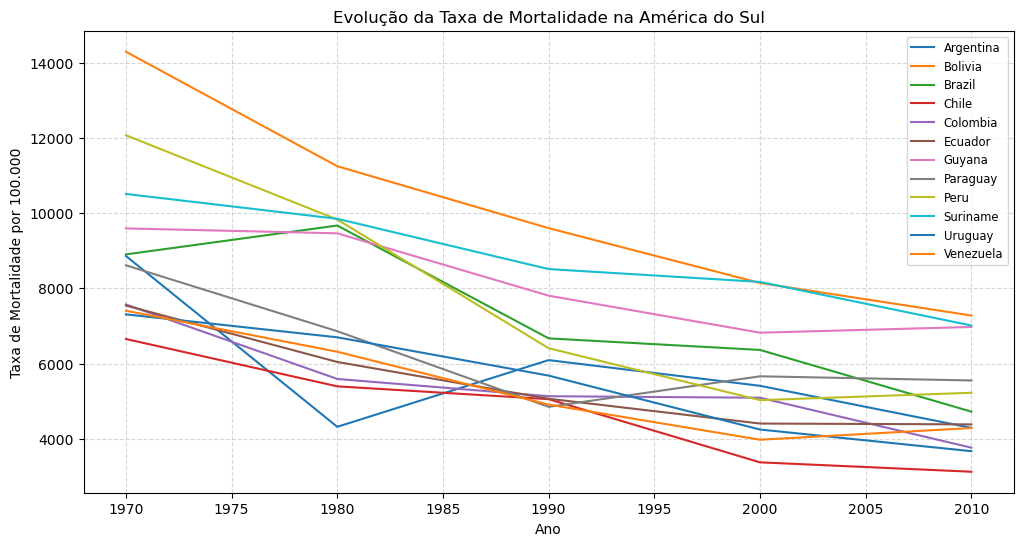

In [87]:

# Lista de países da América do Sul
paises_sulamericanos = [
    "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador",
    "Guyana", "Paraguay", "Peru", "Suriname", "Uruguay", "Venezuela"
]

# Filtrar apenas os países da América do Sul
df_sulamerica = ihm[ihm["Country Name"].isin(paises_sulamericanos)].copy()

# Garantir que as colunas são numéricas
df_sulamerica["Death Rate Per 100000"] = pd.to_numeric(df_sulamerica["Death Rate Per 100000"], errors="coerce")
df_sulamerica["Year"] = pd.to_numeric(df_sulamerica["Year"], errors="coerce")

# Agrupar por país e ano, calculando a média da taxa de mortalidade
media_mortalidade = df_sulamerica.groupby(["Country Name", "Year"])["Death Rate Per 100000"].mean().reset_index()

# Criar o gráfico de linhas
plt.figure(figsize=(12, 6))

for pais in paises_sulamericanos:
    dado_pais = media_mortalidade[media_mortalidade["Country Name"] == pais]
    plt.plot(dado_pais["Year"], dado_pais["Death Rate Per 100000"], label=pais)

# Configurações do gráfico
plt.xlabel("Ano")
plt.ylabel("Taxa de Mortalidade por 100.000")
plt.title("Evolução da Taxa de Mortalidade na América do Sul")
plt.legend(loc="upper right", fontsize="small")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


--------------

<b> 4. Como a taxa de mortalidade por 100.000 indivíduos varia entre diferentes grupos etários dentro do Brasil? Utilize um histograma contendo a distribuição das mortes por ano para cada uma das faixas etárias. </b>

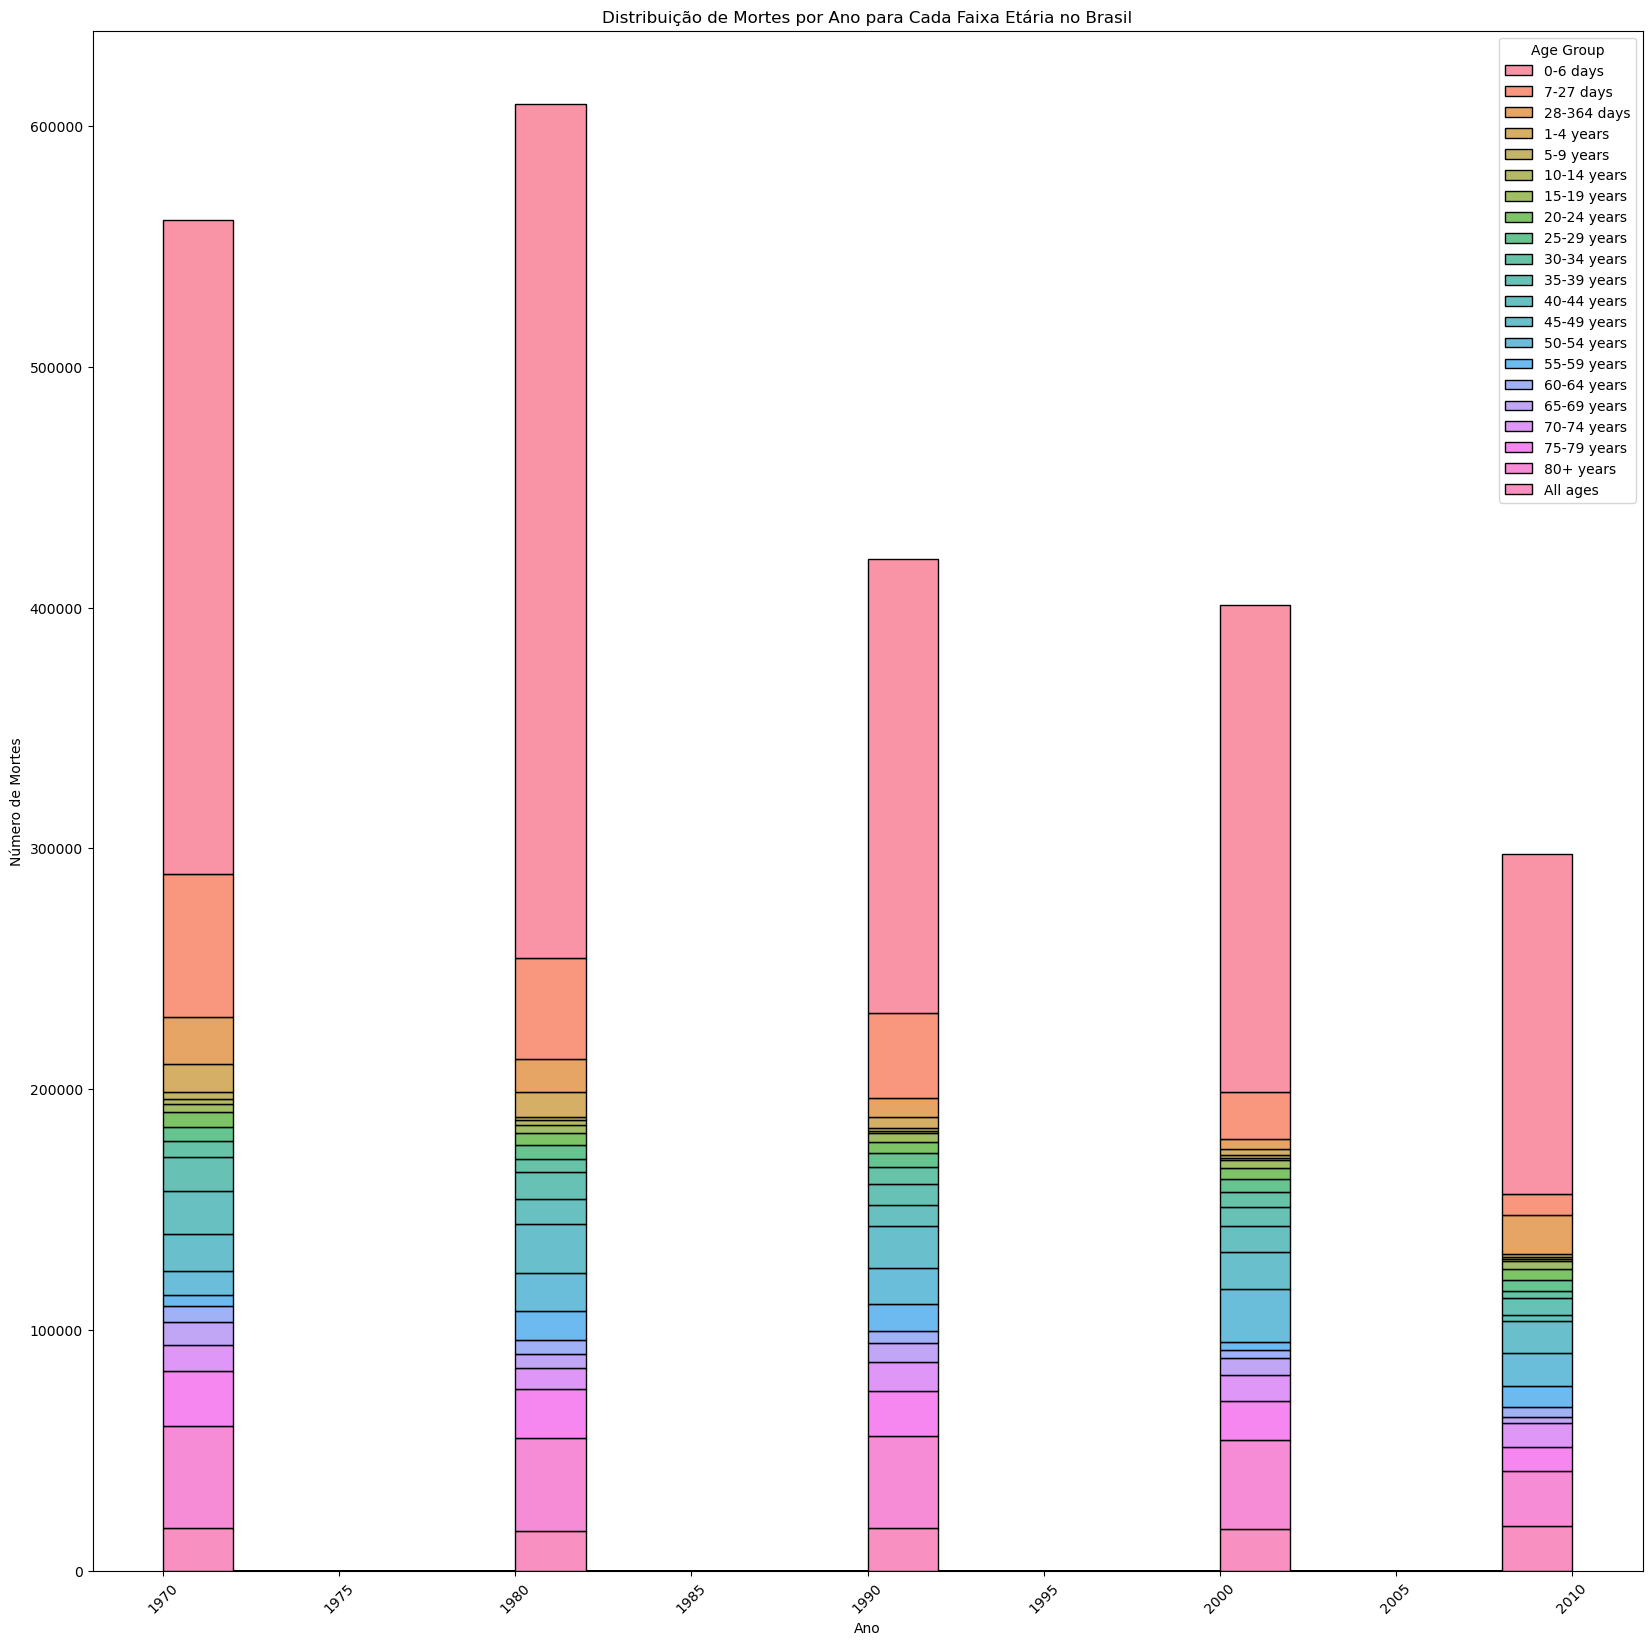

In [111]:
# Filtra os dados apenas para o Brasil
df_brasil = ihm[ihm["Country Name"] == "Brazil"]

# Define o tamanho da figura para melhor visualização
plt.figure(figsize=(20,20))

# Cria um histograma empilhado mostrando a distribuição de mortes por ano, separado por faixa etária
sns.histplot(data=df_brasil, x="Year", hue="Age Group", weights="Death Rate Per 100000", multiple="stack", bins=20)

# Define os rótulos dos eixos e o título do gráfico
plt.xlabel("Ano")
plt.ylabel("Número de Mortes")
plt.title("Distribuição de Mortes por Ano para Cada Faixa Etária no Brasil")
plt.xticks(rotation=45)

# Exibe o gráfico
plt.show()

-----------

<b> 5. Qual a evolução das mortes por gênero pra o Brasil? Trace um gráfico de linhas com cada uma delas representando um dos gêneros ao longo dos anos. </b>

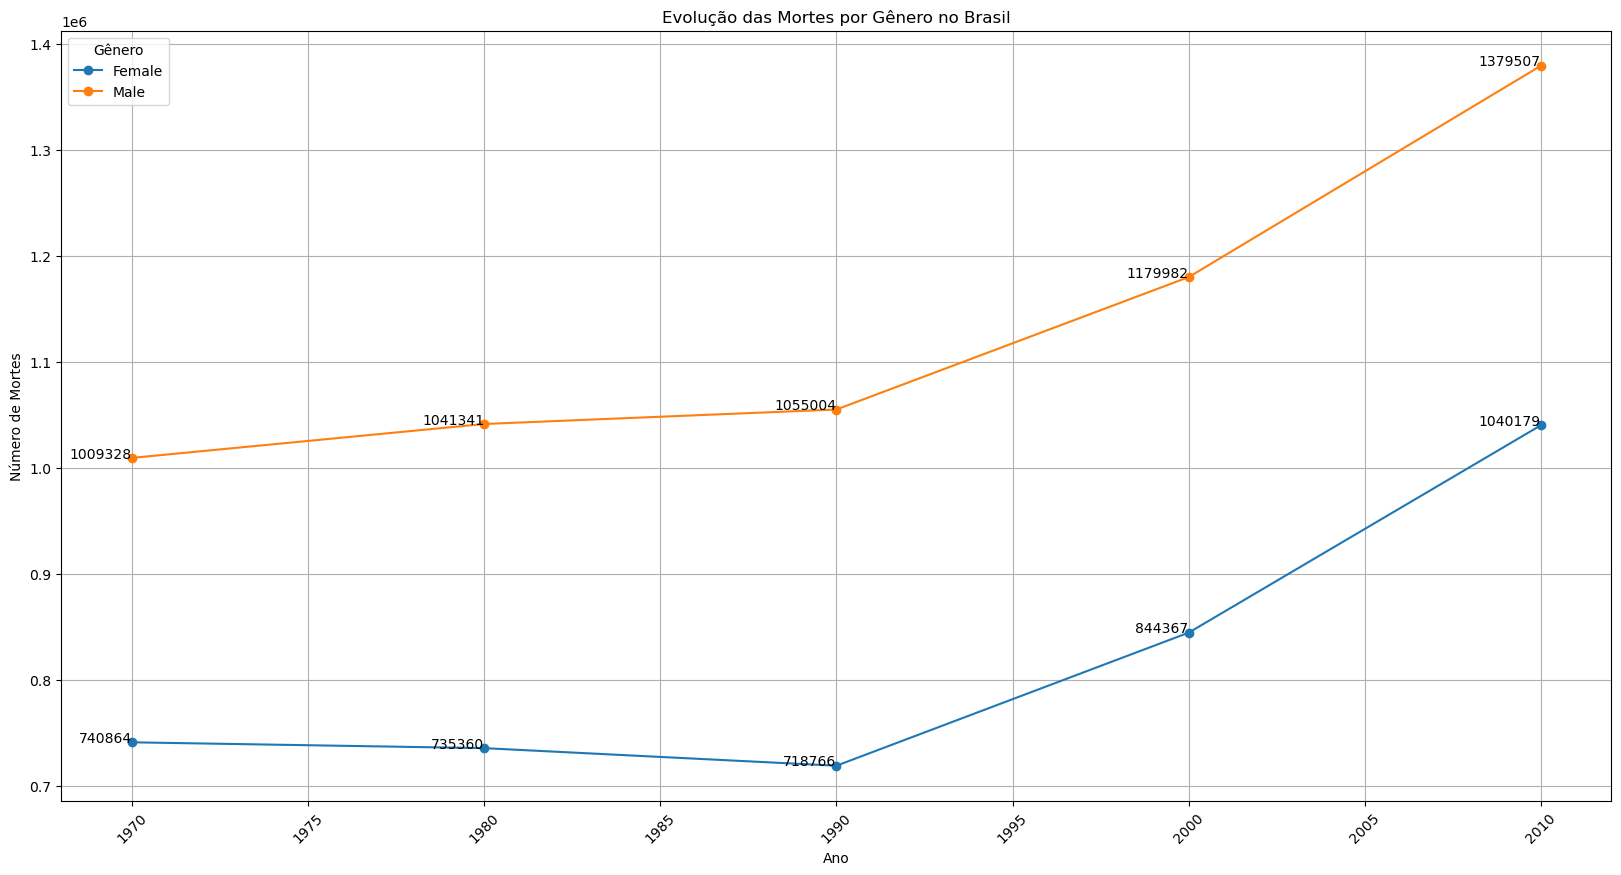

In [113]:
# Remove registros onde o sexo é "Both", mantendo apenas valores separados por gênero
df_brasil = df_brasil[df_brasil["Sex"] != "Both"]

# Garantir que a coluna está numérica
df_brasil["Number of Deaths"] = pd.to_numeric(df_brasil["Number of Deaths"], errors="coerce")

# Agrupa os dados por ano e gênero, somando o número total de mortes
df_brasil_agrupado = df_brasil.groupby(["Year", "Sex"])["Number of Deaths"].sum().reset_index()

################

# Define o tamanho da figura para melhor visualização
plt.figure(figsize=(20, 10))

# Percorre os gêneros e plota a evolução do número de mortes ao longo dos anos
for sexo in df_brasil_agrupado["Sex"].unique():
    subset = df_brasil_agrupado[df_brasil_agrupado["Sex"] == sexo]
    plt.plot(subset["Year"], subset["Number of Deaths"], marker='o', label=sexo)

# Adiciona os rótulos de dados de mortes diretamente no gráfico
for i, txt in enumerate(df_brasil_agrupado['Number of Deaths']):
    plt.text(df_brasil_agrupado['Year'][i], df_brasil_agrupado['Number of Deaths'][i] + 2, str(txt), ha='right', fontsize=10, color='black')

# Define rótulos dos eixos e título do gráfico
plt.xlabel("Ano")
plt.ylabel("Número de Mortes")
plt.title("Evolução das Mortes por Gênero no Brasil")
plt.legend(title="Gênero")
plt.grid(True)
plt.xticks(rotation=45)

# Exibe o gráfico
plt.show()

---------------

<b> 6. Qual grupo etário tem o maior número de mortes no Brasil? </b>

In [128]:
# Filtra os dados apenas para o Brasil e cria uma cópia do DataFrame para evitar alterações no original
brasil_ihm = ihm[ihm["Country Name"] == "Brazil"].copy()

# Garantir que as colunas estão numéricas
brasil_ihm["Year"] = pd.to_numeric(brasil_ihm["Year"], errors="coerce")
brasil_ihm["Number of Deaths"] = pd.to_numeric(brasil_ihm["Year"], errors="coerce")

# Agrupa os dados por faixa etária e soma o número total de mortes em cada grupo
mortes_por_grupo_brasil = brasil_ihm.groupby("Age Group")["Number of Deaths"].sum()

# Identifica e exibe o grupo etário com o maior número total de mortes
print(f"O grupo etário com mais mortes são os que possuem {mortes_por_grupo_brasil.idxmax()} com um total de {mortes_por_grupo_brasil.max()} mortes.")

O grupo etário com mais mortes são os que possuem 0-6 days com um total de 29850 mortes.


<b> 6.1. Este número é o mesmo quando olhamos para todos os anos em comparação com quando consideramos apenas os últimos 10 anos? </b>

In [124]:
# Obtém o último ano disponível no conjunto de dados
ultimo_ano = brasil_ihm["Year"].max()

# Filtra os dados dos últimos 10 anos
ultimos_dez_anos = brasil_ihm[brasil_ihm["Year"] >= (ultimo_ano - 9)]

# Agrupa os dados por faixa etária e soma o número total de mortes nos últimos 10 anos
mortes_por_grupo_brasil_10_anos = ultimos_dez_anos.groupby("Age Group")["Number of Deaths"].sum()

# Identifica e exibe o grupo etário com o maior número total de mortes no período
print(f"O grupo etário com mais mortes nos últimos 10 anos são os que possuem {mortes_por_grupo_brasil_10_anos.idxmax()} com um total de {mortes_por_grupo_brasil_10_anos.max()} mortes.")

O grupo etário com mais mortes nos últimos 10 anos são os que possuem 0-6 days com um total de 6030 mortes.


<b> Comparação entre o total de mortes geral e nos últimos 10 anos. </b>

In [18]:
# Comparação
if mortes_por_grupo_brasil.idxmax() == mortes_por_grupo_brasil_10_anos.idxmax():
    print("O grupo etário com mais mortes é o mesmo nos dois períodos.")
else:
    print("O grupo etário com mais mortes mudou nos últimos 10 anos.")

O grupo etário com mais mortes é o mesmo nos dois períodos.


<b> R: Ou seja, houve diminuição no número de mortes em um período de 10 anos, porém, a faixa etária de "0 a 6 dias" continua sendo a que mais tem casos. </b>

----------------

<b> 7. Qual país apresentou a melhoria mais significativa nas taxas de mortalidade por 100.000 indivíduos ao longo do período analisado? </b>

In [134]:
# Obtém o primeiro e o último ano disponíveis no conjunto de dados
ano_inicial = ihm["Year"].min()
ano_final = ihm["Year"].max()

# Calcula a taxa de mortalidade por país no ano inicial
taxa_inicial = ihm[ihm["Year"] == ano_inicial].groupby("Country Name")["Death Rate Per 100000"].sum()

# Calcula a taxa de mortalidade por país no ano final
taxa_final = ihm[ihm["Year"] == ano_final].groupby("Country Name")["Death Rate Per 100000"].sum()

# Calcula a variação percentual da taxa de mortalidade ao longo do período
variacao_mortalidade = ((taxa_inicial - taxa_final) / taxa_inicial) * 100

# Ordena os países de acordo com a maior melhoria (redução na taxa de mortalidade)
variacao_mortalidade.sort_values(ascending=False)

# Identifica e exibe o país com a maior redução na taxa de mortalidade
print(f" O país com a maior melhoria na taxa de mortalidade é {variacao_mortalidade.idxmax()}, com uma redução de {variacao_mortalidade.max():.2f}%")

 O país com a maior melhoria na taxa de mortalidade é Maldives, com uma redução de 82.73%


-----------

<h2><b> CONCLUSÃO </b></h2>

Em conclusão, a análise de dados sobre taxa de mortalidade é fundamental para compreender as dinâmicas de saúde de uma população e identificar áreas críticas que necessitam de intervenção. <br>
A segmentação de informações por fatores demográficos permite a personalização das políticas de saúde, tornando-as mais eficazes. A análise contínua desses dados é crucial para reduzir desigualdades e promover uma gestão mais eficiente da saúde pública. <br>
Dessa forma, a utilização de dados oferece um caminho sólido para a promoção de um ambiente mais saudável e equilibrado para todos.

<h2> Site do dataset utilizado no projeto: </h2>
<a href="https://www.tableau.com/learn/articles/free-public-data-sets#government"> Tableau Free Public Datasets </a>

<h2> ● Redes Sociais ● </h2>
<b> Linkedin: </b> <a href="https://www.linkedin.com/in/joaopedromarciel/"> João Pedro Marciel </a> <br>
<b> Github: </b> <a href="https://www.github.com/@joaomarciel2"> João Pedro Marciel | @joaomarciel2 </a>